# Personal Loan Campaign

## Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

## Prediction

Build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

## Objectives

- Predict whether a liability customer will buy a personal loan or not.
- Which variables are most significant.
- Which segment of customers should be targeted more.

## Data Directory

* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

### Import necessary libraries

In [477]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes = True)
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import(mean_absolute_error, mean_squared_error, r2_score,f1_score,accuracy_score, recall_score, 
                            precision_score, confusion_matrix, plot_confusion_matrix, make_scorer)

### Load Data

In [394]:
lm=pd.read_csv('Loan_Modelling.csv')
lm.sample(n=10, random_state=1) #print 10 random dataset from lm(loan Modelling)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2764,2765,31,5,84,91320,1,2.9,3,105,0,0,0,0,1
4767,4768,35,9,45,90639,3,0.9,1,101,0,1,0,0,0
3814,3815,34,9,35,94304,3,1.3,1,0,0,0,0,0,0
3499,3500,49,23,114,94550,1,0.3,1,286,0,0,0,1,0
2735,2736,36,12,70,92131,3,2.6,2,165,0,0,0,1,0
3922,3923,31,4,20,95616,4,1.5,2,0,0,0,0,1,0
2701,2702,50,26,55,94305,1,1.6,2,0,0,0,0,1,0
1179,1180,36,11,98,90291,3,1.2,3,0,0,1,0,0,1
932,933,51,27,112,94720,3,1.8,2,0,0,1,1,1,1
792,793,41,16,98,93117,1,4.0,3,0,0,0,0,0,1


In [395]:
lm.shape

(5000, 14)

In [396]:
lm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [397]:
lm.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [398]:
lm.isnull().sum().sort_values(ascending=False)

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

# EDA

### Univariate analysis

***To see glimpse of which factor affects higher probability of purchasing the loan, will perform univariate analysis on 'Age', 'Experience', 'Income', 'CCAvg' and 'Education' by 'Personal_loan'

#### 1. Age 

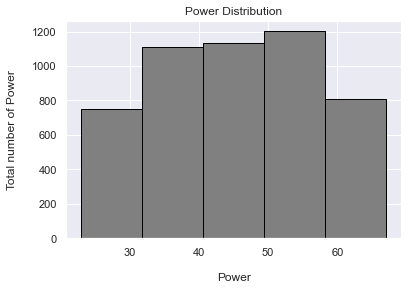

In [399]:
plt.hist(lm['Age'], bins=5, color='gray', edgecolor= 'black'); #draw histplot with 'Power'
plt.title("Power Distribution");#set title name
plt.xlabel('Power',labelpad=15);#label x-axis
plt.ylabel('Total number of Power', labelpad=15); #label y-axis

#### 2. Experience 

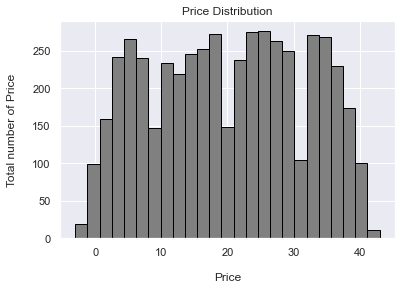

In [400]:
plt.hist(lm['Experience'], bins=25, color='gray', edgecolor= 'black'); #draw histplot with 'Price'
plt.title("Price Distribution");#set title name
plt.xlabel('Price',labelpad=15); #label x-axis
plt.ylabel('Total number of Price', labelpad=15); #label y-axis

#### 3. Income

#### 4. Average spending on credit card 

#### 5. Education

#### 6. Mortgage

#### 7. Family 

### Bivariate Analysis

#### 1. Education vs Income status by people who has professional experience

#### 2. has mortgage by income status

#### 3. Age vs Experience

#### 4. Income vs CCavg vs personal loan

### EDA insights:

- ///

### Actions for data preparation:

- ///

## Data Pre-Processing

#### Null values

As we checked missing values earlier but haven't got any. There were entries with 0 values however, ////

#### Drop categorical columns 

In [401]:
numlm=lm.drop(['ID','ZIPCode'], axis=1)
numlm

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


### income, mortgage *1000 (dollars)

In [402]:
def income_thd(Income):

    if isinstance(Income, int):
        multiplier=1000
        if Income>0:
            return Income*multiplier

numlm['Income'] = numlm['Income'].apply(income_thd) 
numlm.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49000,4,1.6,1,0,0,1,0,0,0
1,45,19,34000,3,1.5,1,0,0,1,0,0,0
2,39,15,11000,1,1.0,1,0,0,0,0,0,0
3,35,9,100000,1,2.7,2,0,0,0,0,0,0
4,35,8,45000,4,1.0,2,0,0,0,0,0,1


In [403]:
def mrtg_thd(Mortgage):

    if isinstance(Mortgage, int):
        multiplier=1000
        if Mortgage>1:
            return Mortgage*multiplier
        else:
            return 0

numlm['Mortgage'] = numlm['Mortgage'].apply(mrtg_thd) 
numlm.head(10)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49000,4,1.6,1,0,0,1,0,0,0
1,45,19,34000,3,1.5,1,0,0,1,0,0,0
2,39,15,11000,1,1.0,1,0,0,0,0,0,0
3,35,9,100000,1,2.7,2,0,0,0,0,0,0
4,35,8,45000,4,1.0,2,0,0,0,0,0,1
5,37,13,29000,4,0.4,2,155000,0,0,0,1,0
6,53,27,72000,2,1.5,2,0,0,0,0,1,0
7,50,24,22000,1,0.3,3,0,0,0,0,0,1
8,35,10,81000,3,0.6,2,104000,0,0,0,1,0
9,34,9,180000,1,8.9,3,0,1,0,0,0,0


#### Create dummy data: 'Education'

In [404]:
dummy_data = pd.get_dummies(
    numlm,
    columns=[
        "Education"
    ]
)
dummy_data.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Education_1,Education_2,Education_3
0,25,1,49000,4,1.6,0,0,1,0,0,0,1,0,0
1,45,19,34000,3,1.5,0,0,1,0,0,0,1,0,0
2,39,15,11000,1,1.0,0,0,0,0,0,0,1,0,0
3,35,9,100000,1,2.7,0,0,0,0,0,0,0,1,0
4,35,8,45000,4,1.0,0,0,0,0,0,1,0,1,0


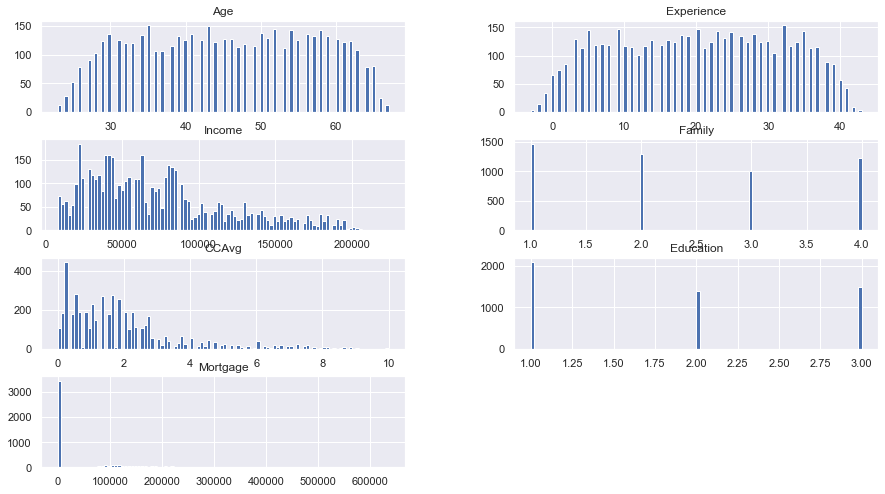

In [405]:
columns = list(numlm)[0:-5] # Excluding Outcome column which has only 
numlm[columns].hist(stacked=False, bins=100, figsize=(15,30), layout=(14,2)); 
# Histogram of first 8 columns

### Correlation on Data

In [406]:
numlm.corr() # It will show correlation matrix 

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.052563,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal_Loan,-0.007726,-0.007413,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities_Account,-0.000436,-0.001232,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD_Account,0.008043,0.010353,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


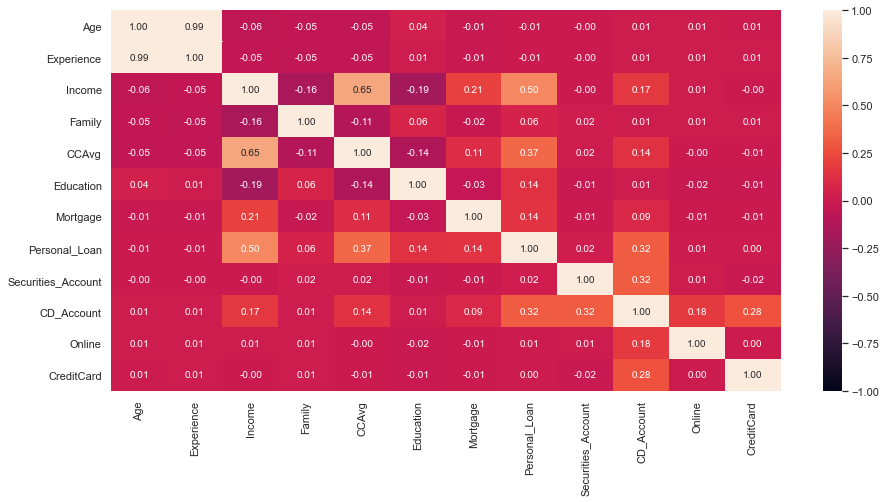

In [407]:
plt.figure(figsize=(15, 7))
sns.heatmap(numlm.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f") #draw heatmap that shows corr
plt.show()

- income vs ccavg
- age vs experience
- income vs personal loan
- credit card vs cd account

#### Check outlier

In [408]:
box
scatter
zscore

NameError: name 'box' is not defined

#### Deal with outlier

In [ ]:
z-score
ROI

#### Split Data

In [422]:
from sklearn.model_selection import train_test_split

X = numlm.drop(['Income'], axis=1)
y = numlm['Income']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,Age,Experience,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
1334,47,22,2,1.3,1,0,0,0,0,1,0
4768,38,14,1,2.0,2,0,0,0,0,1,0
65,59,35,1,3.8,1,0,0,0,0,1,1
177,29,3,4,1.8,2,244000,0,0,0,0,0
4489,39,13,3,0.2,2,0,0,0,0,1,0


#### Check data 

In [423]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(numlm.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(numlm.index)) * 100))

70.00% data is in training set
30.00% data is in test set


#### Check data shape for train and test set

In [424]:
print(x_train.shape, x_test.shape)

(3500, 11) (1500, 11)


- There are 3500 rows and 13 columns in training set
- There are 1500 rows and 13 columns in testing set

In [425]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
38     0.018857
40     0.016571
81     0.016000
44     0.015714
39     0.015429
         ...   
189    0.000571
151    0.000286
218    0.000286
202    0.000286
224    0.000286
Name: Income, Length: 162, dtype: float64
Percentage of classes in test set:
41     0.020667
44     0.020000
83     0.018667
81     0.018000
39     0.018000
         ...   
181    0.000667
174    0.000667
169    0.000667
199    0.000667
202    0.000667
Name: Income, Length: 151, dtype: float64


#### Fitting linear regression model

In [426]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

#### Check coefficients and intercepts

In [427]:
coef_numlm = pd.DataFrame(
    np.append(lin_reg_model.coef_, lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_numlm

,Coefficients
Age,-0.948375
Experience,0.856574
Family,-4.562780
CCAvg,12.684365
Education,-8.282277
Mortgage,0.000043
Personal_Loan,52.196114
Securities_Account,-2.436191
CD_Account,0.792213
Online,1.914774


In [428]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [429]:
# Checking model performance on train set
lin_reg_model_train_perf = model_performance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,31.166508,24.761478,0.544159,0.542721,55.294482


In [430]:
# Checking model performance on test set
lin_reg_model_test_perf = model_performance_regression(lin_reg_model, x_test, y_test)
lin_reg_model_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,30.334264,24.367608,0.559735,0.55648,53.977142


### dealing with overfitting :cross validation

In [455]:
!pip install mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=x_train.shape[1],
    forward=True,  # k_features denotes the number of features to select
    floating=False,
    scoring="r2",
    n_jobs=-1,  # n_jobs=-1 means all processor cores will be used
    verbose=0,
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)

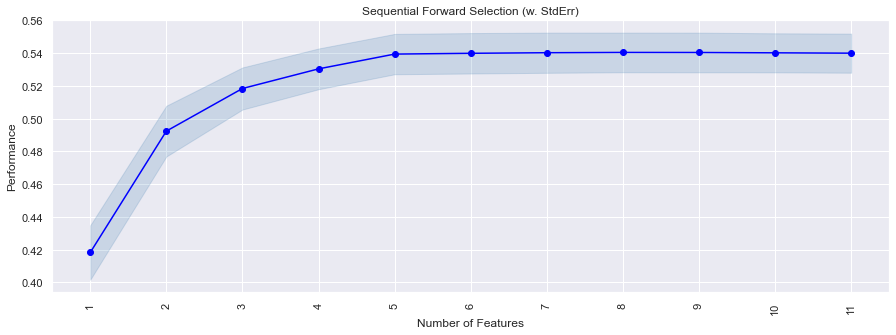

In [456]:
# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_err", figsize=(15, 5))
plt.title("Sequential Forward Selection (w. StdErr)")
plt.xticks(rotation=90)
plt.show()

In [459]:
reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=11,
    forward=True,
    floating=False,
    scoring="r2",
    n_jobs=-1,
    verbose=2,
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2021-09-03 04:43:01] Features: 1/11 -- score: 0.41830490336373105[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2021-09-03 04:43:01] Features: 2/11 -- score: 0.4924220837464432[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2021-09-03 04:43:01

In [460]:
#select the features which are important
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [461]:
# print the names of the important features
x_train.columns[feat_cols]

Index(['Age', 'Experience', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online',
       'CreditCard'],
      dtype='object')

In [462]:
x_train_final = x_train[x_train.columns[feat_cols]]

In [463]:
# Creating new x_test with the same variables that we selected for x_train
x_test_final = x_test[x_train_final.columns]

In [464]:
# Fitting linear model
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(x_train_final, y_train)

# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(lin_reg_model2.coef_.flatten(), lin_reg_model2.intercept_),
    index=x_train_final.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
print(coef_df)

                    Coefficients
Age                    -0.948375
Experience              0.856574
Family                 -4.562780
CCAvg                  12.684365
Education              -8.282277
Mortgage                0.000043
Personal_Loan          52.196114
Securities_Account     -2.436191
CD_Account              0.792213
Online                  1.914774
CreditCard             -0.264708
Intercept              93.234921


In [465]:
# model performance on train set
print("Training Performance\n")
lin_reg_model2_train_perf = model_performance_regression(
    lin_reg_model2, x_train_final, y_train
)
lin_reg_model2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,31.166508,24.761478,0.544159,0.542721,55.294482


In [466]:
# model performance on test set
print("Test Performance\n")
lin_reg_model2_test_perf = model_performance_regression(
    lin_reg_model2, x_test_final, y_test
)
lin_reg_model2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,30.334264,24.367608,0.559735,0.55648,53.977142


In [467]:
# training performance comparison

models_train_comp_df = pd.concat(
    [lin_reg_model_train_perf.T, lin_reg_model2_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression sklearn (SFS features)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression sklearn,Linear Regression sklearn (SFS features)
RMSE,31.166508,31.166508
MAE,24.761478,24.761478
R-squared,0.544159,0.544159
Adj. R-squared,0.542721,0.542721
MAPE,55.294482,55.294482


In [468]:
# test performance comparison

models_test_comp_df = pd.concat(
    [lin_reg_model_test_perf.T, lin_reg_model2_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression sklearn (SFS features)",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression sklearn,Linear Regression sklearn (SFS features)
RMSE,30.334264,30.334264
MAE,24.367608,24.367608
R-squared,0.559735,0.559735
Adj. R-squared,0.556480,0.556480
MAPE,53.977142,53.977142


- need adjustment 

### Logistic Regression

- Build the logistic regression model.
- Provide interpretations based on coefficients obtained from the logistic regression model 
- Comment on model performance

In [411]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear", random_state=1)
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_numlm = pd.DataFrame(model.coef_)
coef_numlm['intercept'] = model.intercept_
print(coef_numlm)

            0         1         2         3         4             5  \
0    0.222662 -0.133714 -0.001037  0.064804  0.036049  5.163202e-06   
1    0.040175  0.014135 -0.000409  0.002195  0.002646 -1.010919e-06   
2    0.028174 -0.006565 -0.000322  0.003498  0.000910 -3.070054e-06   
3    0.020486 -0.013960 -0.000262 -0.002314  0.002003  4.848961e-06   
4    0.003602  0.001613 -0.000215  0.000369  0.000018  2.782271e-07   
..        ...       ...       ...       ...       ...           ...   
157 -0.460517  0.390468  0.000048 -0.367638  0.169829 -1.606554e-04   
158 -0.564853  0.485323  0.000063  0.020372 -0.256674 -2.115210e-04   
159 -0.688139  0.596535  0.000076 -0.263725 -0.285881  2.781849e-06   
160 -0.679964  0.652599  0.000068 -0.097489 -0.134092 -2.562955e-04   
161 -0.917755  0.948350  0.000092 -0.111682 -0.184277 -2.132199e-04   

                6         7         8         9        10  intercept  
0   -1.293663e-11  0.005932 -0.000406  0.007358  0.009280   0.013306  
1   -

In [412]:
model_score = model.score(x_test, y_test)
print(model_score)

0.037333333333333336


In [472]:
##  Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

In [473]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model performance evaluation and improvement

- Comment on which metric is right for model performance evaluation and why? - Can model performance be improved? If yes, then do it using appropriate techniques for logistic regression and comment on model performance after improvement

### Decision Tree Model

In [474]:
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.15, 1: 0.85}, random_state=1
)

NameError: name 'DecisionTreeClassifier' is not defined

In [ ]:
model.fit(X_train, y_train)

#### Checking training set model performance

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
decision_tree_perf_train = get_recall_score(model, X_train, y_train)

print("Recall Score:", decision_tree_perf_train)

#### checking test set model performance

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
decision_tree_perf_test = get_recall_score(model, X_test, y_test)
print("Recall Score:", decision_tree_perf_test)

### Visualizing Decision Tree

In [ ]:
## creating a list of column names
feature_names = X_train.columns.to_list()

In [ ]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Tuning tree model

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

#### checking training set performance

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [ ]:
decision_tree_tune_perf_train = get_recall_score(estimator, X_train, y_train)
print("Recall Score:", decision_tree_tune_perf_train)

#### Checking test set performance

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
decision_tree_tune_perf_test = get_recall_score(estimator, X_test, y_test)
print("Recall Score:", decision_tree_tune_perf_test)

In [ ]:
### Decision Tree visualization

In [ ]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

#### Observations:

Using the above extracted decision rules we can make interpretations from the decision tree model like:

* If a customer lands on a page with exit rate less than 0.04 and spends less than 315 seconds on the product related page and the month is not May, March or December then the customer will be contributing to the revenue. But if the month is December then the customer will not contribute to the revenue.

`Interpretations from other decision rules can be made similarly`

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

In [ ]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Pruning

In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.15, 1: 0.85}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

In [ ]:
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [ ]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()